In [1]:
import numpy as np

path = '../bayes_implicit_solvent/tests/sampled_radii.npy'

In [2]:
radii = np.load(path)

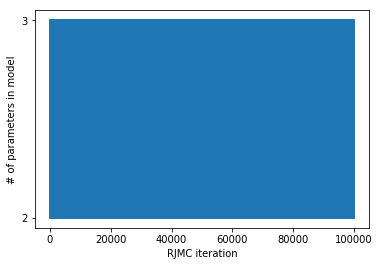

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

lengths = [len(r) for r in radii]

plt.plot(lengths)
plt.xlabel('RJMC iteration')
plt.ylabel('# of parameters in model')
plt.yticks(sorted(list(set(lengths))));

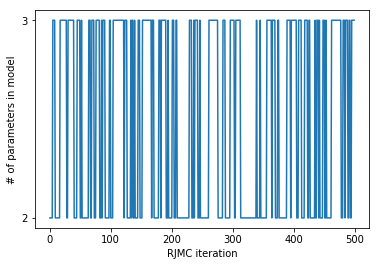

In [4]:
plt.plot(lengths[:500])
plt.xlabel('RJMC iteration')
plt.ylabel('# of parameters in model')
plt.yticks(sorted(list(set(lengths))));

([<matplotlib.axis.YTick at 0x1138e8748>,
 <a list of 2 Text yticklabel objects>)

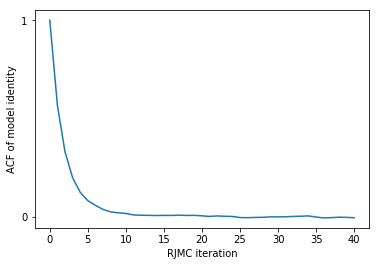

In [5]:
from statsmodels.tsa.stattools import acf
plt.plot(acf([len(r) for r in radii]))
plt.xlabel('RJMC iteration')
plt.ylabel('ACF of model identity')
plt.yticks([0,1])

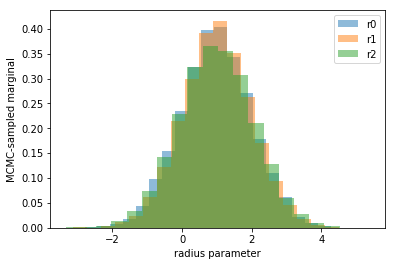

In [6]:
hist_kwargs = {'density': True, 'alpha': 0.5, 'bins': 20}
plt.hist([r[0] for r in radii], label='r0', **hist_kwargs);
plt.hist([r[1] for r in radii], label='r1',**hist_kwargs);
plt.hist([r[2] for r in radii if len(r) == 3],label='r2', **hist_kwargs);
plt.xlabel('radius parameter')
plt.ylabel('MCMC-sampled marginal')
plt.legend()

In [7]:
i = 0
rvs = np.array([r[i] for r in radii if len(r) > i])
len(rvs)

100001

In [8]:
from scipy.stats import kstest

# check that we're not producing mean-zero Gaussian values
kstest_result = kstest(rvs[::20], 'norm')
pvalue_should_be_under_threshold = kstest_result.pvalue
kstest_result

KstestResult(statistic=0.3778243916476196, pvalue=0.0)

In [9]:
threshold = 0.001

In [10]:
assert(pvalue_should_be_under_threshold < threshold)

In [11]:
# check that we're producing mean 1.0 Gaussian values
from scipy.stats import norm
kstest_result = kstest(rvs[::20], norm(loc=1.0).cdf)
pvalue_should_be_over_threshold = kstest_result.pvalue
kstest_result

KstestResult(statistic=0.014303155636135267, pvalue=0.25788933723593016)

In [12]:
assert(pvalue_should_be_over_threshold > threshold)

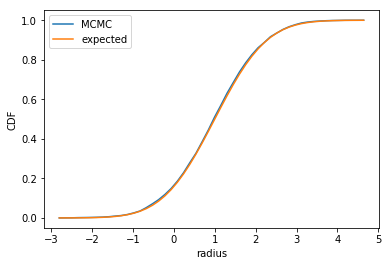

In [13]:
x = np.linspace(min(rvs), max(rvs))
y_expected = norm(loc=1.0).cdf(x)
y_empirical = np.array([np.mean(rvs <= x_) for x_ in x])
plt.plot(x, y_empirical, label='MCMC')
plt.plot(x, y_expected, label='expected')
plt.xlabel('radius')
plt.ylabel('CDF')
plt.legend()